In [1]:
import matplotlib.pyplot as plt
import onnxruntime as ort
import numpy as np
import cv2

from letterbox import letterbox

In [14]:
model_path = "best_my.onnx"

session = ort.SessionOptions()
session = ort.InferenceSession(model_path, providers=['CPUExecutionProvider','CUDAExecutionProvider'])

input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

In [15]:
image_path = '900x450.jpg'
real_img = cv2.imread(image_path)
image, ratio, dwdh = letterbox(real_img, auto=False)

image = image.transpose(2,0,1) / 255.
image = image[np.newaxis, :, :, :].astype(np.float32)

output_data = session.run([output_name], {input_name: image})[0][0].T
print(output_data.shape)

(8400, 5)


In [16]:
def decrease_box(output_data):
        matrix = output_data[output_data[:,4]>0.1]
        sorted_matrix_x = matrix[matrix[:, 1].argsort()]
        sorted_matrix_x = sorted_matrix_x[sorted_matrix_x[:, 0].argsort()]
        return sorted_matrix_x

In [17]:
output_data = decrease_box(output_data)

In [18]:
output_data.shape

(263, 5)

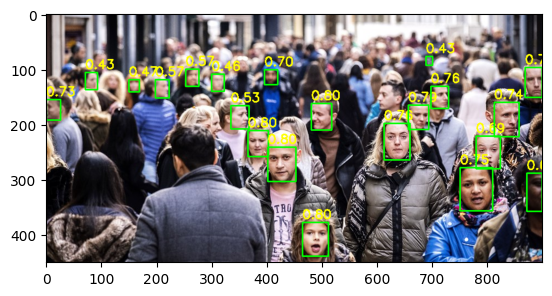

In [19]:
#output_data = np.unique(np.round_((output_data[:,4][output_data[:,4]>0.3]),2))
thresh = 0.3

for (x0, y0, x1, y1, scores) in output_data[output_data.shape[0]%10::10]:
    if scores > thresh:
        x0 -= dwdh[0]
        y0 -= dwdh[1]
        box = np.array([x0-x1/2, y0-y1/2, x0+x1/2, y0+y1/2])
        box /= ratio
        box = np.round(box).astype(np.int32).tolist()

        score = float(scores)

        cv2.rectangle(real_img, box[:2], box[2:], (0,255,0), 2)
        cv2.putText(real_img, str(score)[:4], (box[0], box[1] - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.75, [0, 255, 255], thickness=2)
            
plt.imshow(cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB))
plt.show()

In [1]:
import cv2
import matplotlib.pyplot as plt
import onnxruntime as ort
import numpy as np

from letterbox import letterbox

model_path = "best_my.onnx"

session = ort.SessionOptions()
session = ort.InferenceSession(model_path, providers=['CPUExecutionProvider','CUDAExecutionProvider'])

input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

video_path = 0
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    image, ratio, dwdh = letterbox(frame, auto=False)

    image = image.transpose(2,0,1) / 255.
    image = image[np.newaxis, :, :, :].astype(np.float32)

    output_data = session.run([output_name], {input_name: image})[0][0].T
    #print(output_data.shape)

    def decrease_box(output_data):
        matrix = output_data[output_data[:,4]>0.1]
        sorted_matrix_x = matrix[matrix[:, 1].argsort()]
        sorted_matrix_x = sorted_matrix_x[sorted_matrix_x[:, 0].argsort()]
        return sorted_matrix_x

    thresh = 0.3
    dec_box = decrease_box(output_data)
    #print(dec_box)
    for (x0, y0, x1, y1, scores) in dec_box[dec_box.shape[0]%10::10]:
        if scores > thresh:
            x0 -= dwdh[0]
            y0 -= dwdh[1]
            box = np.array([x0-x1/2, y0-y1/2, x0+x1/2, y0+y1/2])
            box /= ratio
            box = np.round(box).astype(np.int32).tolist()

            
            score = round(float(scores),2)

            cv2.rectangle(frame, box[:2], box[2:], (0,255,0), 2)
            cv2.putText(frame, str(score), (box[0], box[1] - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.75, [0, 255, 255], thickness=2)

    # plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    # plt.show()
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [6]:
dec_box.shape

(10, 5)

In [ ]:
# import streamlit as st
# import matplotlib.pyplot as plt
# import onnxruntime as ort
# import numpy as np
# import cv2
# #from letterbox import letterbox

# st.title('Face detiction model')
# st.write('This is demo version')
# import streamlit as st
# import random

# # callback to update emojis in Session State
# # in response to the on_click event
# def random_emoji():
#     st.session_state.emoji = random.choice(emojis)

# # initialize emoji as a Session State variable
# if "emoji" not in st.session_state:
#     st.session_state.emoji = "👈"

# emojis = ["🐶", "🐱", "🐭", "🐹", "🐰", "🦊", "🐻", "🐼"]

# #st.button(f"Click Me {st.session_state.emoji}", on_click=random_emoji)
# #st.file_uploader(f"Choose a file {:ice_cream:}")

# import streamlit as st
# import io
# import cv2


# st.title("Play Uploaded File")

# uploaded_file = st.file_uploader("Choose a video...,:ice_cream:", type=["mp4"])
# temporary_location = False

# if uploaded_file is not None:
#     g = io.BytesIO(uploaded_file.read())  ## BytesIO Object
#     temporary_location = "testout_simple.mp4"

#     with open(temporary_location, 'wb') as out:  ## Open temporary file as bytes
#         out.write(g.read())  ## Read bytes into file

#     # close file
#     out.close()


# @st.cache_data
# def get_cap(location):
#     print("Loading in function", str(location))
#     video_stream = cv2.VideoCapture(str(location))

#     # Check if camera opened successfully
#     if (video_stream.isOpened() == False):
#         print("Error opening video  file")
#     return video_stream


# scaling_factorx = 0.25
# scaling_factory = 0.25
# image_placeholder = st.empty()

# if temporary_location:
#     while True:
#         # here it is a CV2 object
#         video_stream = get_cap(temporary_location)
#         # video_stream = video_stream.read()
#         ret, image = video_stream.read()
#         if ret:
#             image = cv2.resize(image, None, fx=scaling_factorx, fy=scaling_factory, interpolation=cv2.INTER_AREA)
#         else:
#             print("there was a problem or video was finished")
#             cv2.destroyAllWindows()
#             video_stream.release()
#             break
#         # check if frame is None
#         if image is None:
#             print("there was a problem None")
#             # if True break the infinite loop
#             break

#         image_placeholder.image(image, channels="BGR", use_column_width=True)

#         cv2.destroyAllWindows()
#     video_stream.release()


#     cv2.destroyAllWindows()

# model_path = "best_my.onnx"

# session = ort.SessionOptions()
# session = ort.InferenceSession(model_path, providers=['CPUExecutionProvider','CUDAExecutionProvider'])

# input_name = session.get_inputs()[0].name
# output_name = session.get_outputs()[0].name

# image_path = '900x450.jpg'
# real_img = cv2.imread(image_path)
# image, ratio, dwdh = letterbox(real_img, auto=False)

# image = image.transpose(2,0,1) / 255.
# image = image[np.newaxis, :, :, :].astype(np.float32)

# output_data = session.run([output_name], {input_name: image})[0][0].T
# print(output_data.shape)

# def decrease_box(output_data):
#         matrix = output_data[output_data[:,4]>0.1]
#         sorted_matrix_x = matrix[matrix[:, 1].argsort()]
#         sorted_matrix_x = sorted_matrix_x[sorted_matrix_x[:, 0].argsort()]
#         return sorted_matrix_x

# def decrease_box(output_data):
#         matrix = output_data[output_data[:,4]>0.1]
#         sorted_matrix_x = matrix[matrix[:, 1].argsort()]
#         sorted_matrix_x = sorted_matrix_x[sorted_matrix_x[:, 0].argsort()]
#         return sorted_matrix_x


# thresh = 0.3

# for (x0, y0, x1, y1, scores) in output_data[output_data.shape[0]%10::10]:
#     if scores > thresh:
#         x0 -= dwdh[0]
#         y0 -= dwdh[1]
#         box = np.array([x0-x1/2, y0-y1/2, x0+x1/2, y0+y1/2])
#         box /= ratio
#         box = np.round(box).astype(np.int32).tolist()

#         score = float(scores)

#         cv2.rectangle(real_img, box[:2], box[2:], (0,255,0), 2)
#         cv2.putText(real_img, str(score)[:4], (box[0], box[1] - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.75, [0, 255, 255], thickness=2)
            
# plt.imshow(cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB))
# plt.show()
